### Script to visualize WRF output from PI Rupper

* prelimiary, 1 month of sample data uploaded to ADAPT by A. Kochanski to /att/nobackup/
* here we test a brand new module, [wrf-python](http://wrf-python.readthedocs.io/en/latest/)
* using Python 2.7 for now

In [1]:
%matplotlib inline

from __future__ import print_function

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords

### Look at output from a two-way nested run (d02) for a single day

<xarray.DataArray 'SNOW' (south_north: 219, west_east: 270)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       ..., 
       [ 0.      ,  0.      ,  0.      , ...,  0.027869,  0.078449,  0.140131],
       [ 0.      ,  0.      ,  0.      , ...,  0.037416,  0.129815,  0.222608],
       [ 0.      ,  0.      ,  0.002445, ...,  2.085687,  1.629384,  1.185776]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 60.8937 61.0035 61.1133 ...
    XLAT     (south_north, west_east) float32 17.937 17.9511 17.9651 17.979 ...
    XTIME    float32 0.0
    Time     datetime64[ns] 2000-01-01
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SNOW WATER EQUIVALENT
    units:        kg m-2
    stagger:      
    

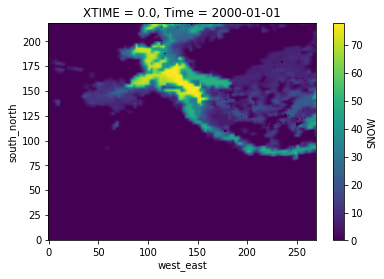

In [9]:
ncfile = Dataset("/att/nobackup/akochans/WRF/2000/wrfout_d02_2000-01-01_00:00:00")
        
# Get the Snow variable
ds = getvar(ncfile, "SNOW")

print(ds)
ds.plot()

### Example of a fancier plot

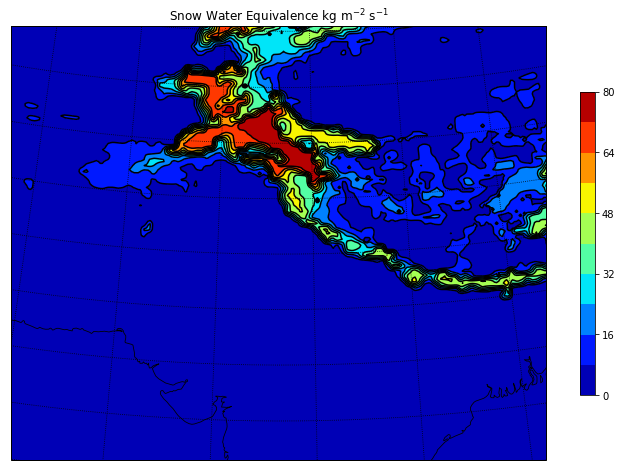

In [24]:
# Get the latitude and longitude points
lats, lons = latlon_coords(ds)

# Get the cartopy mapping object
cart_proj = get_cartopy(ds)

# Create a figure
fig = plt.figure(figsize=(12,9))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level pressure.
plt.contour(to_np(lons), to_np(lats), to_np(ds), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(ds), 10, transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.62)

# Set the map limits.  Not really necessary, but used for demonstration.
ax.set_xlim(cartopy_xlim(ds))
ax.set_ylim(cartopy_ylim(ds))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title(r"Snow Water Equivalence kg m$^{-2}$ s$^{-1}$")

plt.show()